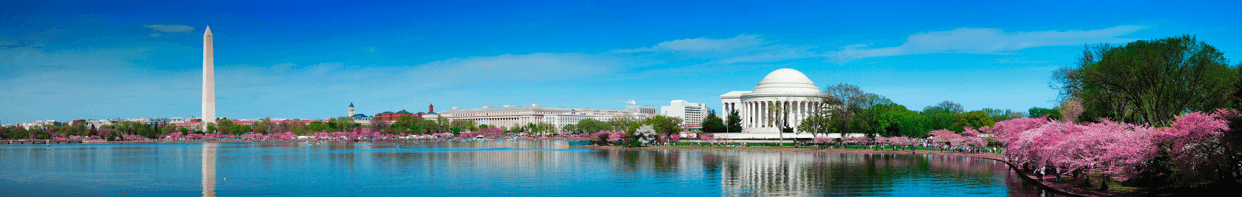

# What Makes a house expensive in DC?
Analyzing property prices from D.C. Residential Properties [dataset](https://www.kaggle.com/christophercorrea/dc-residential-properties)

Authors: Fitsum Endashaw and Dawit Hailu

<h3>Introduction</h3>

   Washington, D.C. is the capital of the United States. Washington's population is approaching 700,000 people, and has been growing since 2000 following a half-century of population decline. The city is highly segregated and features a high cost of living. In 2017, the average price of a single family home in the district was $649,000. This dataset provides insight on the housing stock of the district.


In this tutorial, we wanted to analyze DC's housing market to find out the subtle nuances that make or break a property.


 

# 1. Primarily 

   # Required Libraries
      Pandas: used for data display and partitioning
      Matplotlib: used for plotting Pandas data into graphs and charts
      Seaborn: provides a high-level interface for graphics on top of Matplotlib
      folium: provides geographical maps
      scikit-learn: machine learning library
      linear-model: used to calculate models for multiple linear regression
      model_selection: used to split up dataset into test and training data 
      statsmodels - api: used to calculate models 

In [1]:
#Import needed libraries
!pip install folium
import pandas as pd
import numpy as np
import folium
from folium.map import *
import requests
import matplotlib.pyplot as plt
from sklearn import linear_model
import os
from branca.utilities import split_six
from statsmodels.formula.api import ols
import statsmodels.api as sm
import seaborn as sns



You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# 1.2 Load and View Data
   In this step, we Load the CSV file using (pd.read_csv) to make the data frame. Then, we displayed the first 5 rows of the table using (head()).

In [2]:

data = pd.read_csv("DC_Properties.csv",dtype=object)

data.head()

Unnamed: 0 BATHRM HF_BATHRM           HEAT AC NUM_UNITS ROOMS BEDRM     AYB  \
0          0      4         0      Warm Cool  Y       2.0     8     4  1910.0   
1          1      3         1      Warm Cool  Y       2.0    11     5  1898.0   
2          2      3         1  Hot Water Rad  Y       2.0     9     5  1910.0   
3          3      3         1  Hot Water Rad  Y       2.0     8     5  1900.0   
4          4      2         1      Warm Cool  Y       1.0    11     3  1913.0   

  YR_RMDL   ...        LONGITUDE ASSESSMENT_NBHD ASSESSMENT_SUBNBHD  \
0  1988.0   ...     -77.04083204      Old City 2   040 D Old City 2   
1  2007.0   ...     -77.04076447      Old City 2   040 D Old City 2   
2  2009.0   ...     -77.04067788      Old City 2   040 D Old City 2   
3  2003.0   ...     -77.04062899      Old City 2   040 D Old City 2   
4  2012.0   ...     -77.03936127      Old City 2   040 D Old City 2   

  CENSUS_TRACT CENSUS_BLOCK    WARD SQUARE                   X  \
0       4201.0  004201 2006  Ward 2   0152  -77.04042907495098   
1       4201.0  004201 2006  Ward 2   0152  -77.04042907495098   
2       4201.0  004201 2006  Ward 2   0152  -77.04042907495098   
3       4201.0  004201 2006  Ward 2   0152  -77.04042907495098   
4       4201.0  004201 2006  Ward 2   0152  -77.04042907495098   

                    Y QUADRANT  
0  38.914881109044266       NW  
1  38.914881109044266       NW  
2  38.914881109044266       NW  
3  38.914881109044266       NW  
4  38.914881109044266       NW  

[5 rows x 49 columns]

# 1.3 Cheak Completeness of the data
In this section, we quantify the missing data in percent for each feature included in the data to know how complete our data set is before doing any further work on it.

After calculating the percentage of the missing data, we displayed the results on a graph below for better visualization.

In [3]:
dc = (data.isnull().sum() / len(data)) * 100
dc = dc.drop(dc[dc == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing %' :dc})


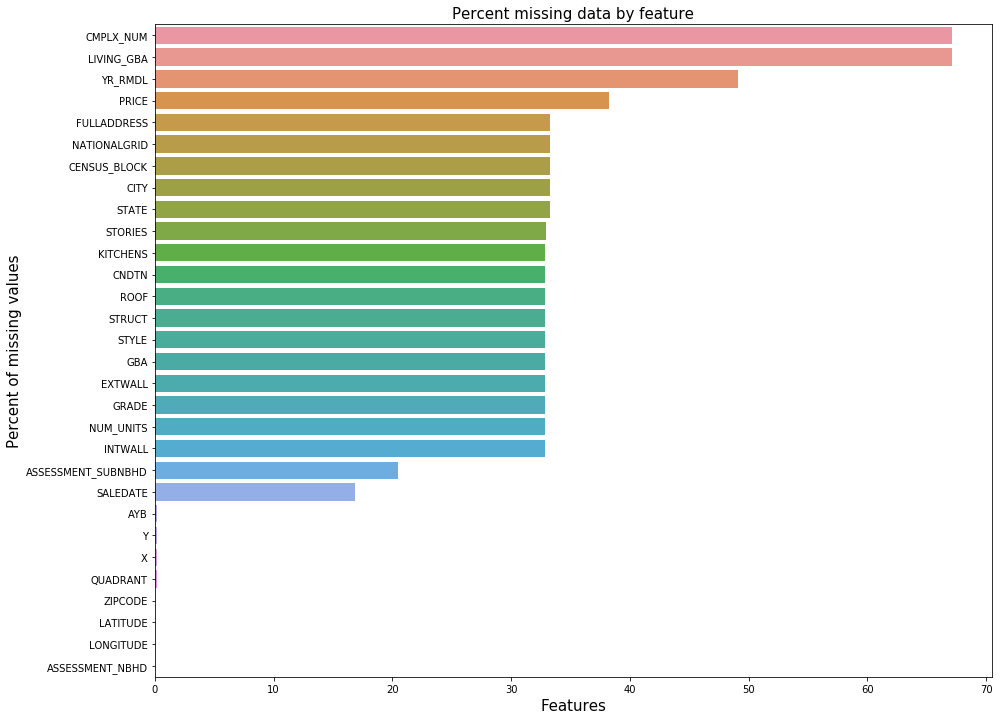

In [4]:
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(y=dc.index, x=dc)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

# 1.4 cleaning the data

For robust analysis and smooth calculations, we need to drop all unnecessary columns using(drop()) and we need to remove duplicates using (drop_duplicates()). Data cleaning is not done we will be doing more cleaning after isolating the tables. 

In [5]:
#drop all unnecessary columns

data = data.drop('USECODE', 1)
data = data.drop('SOURCE', 1)
data = data.drop('ASSESSMENT_NBHD', 1)
data = data.drop('ASSESSMENT_SUBNBHD', 1)
data = data.drop('CENSUS_TRACT', 1)
data = data.drop('CENSUS_BLOCK', 1)

#Remove duplicate rows
data = data.drop_duplicates()


#Display the first 5 rows of the table
data.head()

Unnamed: 0 BATHRM HF_BATHRM           HEAT AC NUM_UNITS ROOMS BEDRM     AYB  \
0          0      4         0      Warm Cool  Y       2.0     8     4  1910.0   
1          1      3         1      Warm Cool  Y       2.0    11     5  1898.0   
2          2      3         1  Hot Water Rad  Y       2.0     9     5  1910.0   
3          3      3         1  Hot Water Rad  Y       2.0     8     5  1900.0   
4          4      2         1      Warm Cool  Y       1.0    11     3  1913.0   

  YR_RMDL   ...    STATE  ZIPCODE        NATIONALGRID     LATITUDE  \
0  1988.0   ...       DC  20009.0  18S UJ 23061 09289  38.91468021   
1  2007.0   ...       DC  20009.0  18S UJ 23067 09289   38.9146833   
2  2009.0   ...       DC  20009.0  18S UJ 23074 09289  38.91468351   
3  2003.0   ...       DC  20009.0  18S UJ 23078 09288  38.91468254   
4  2012.0   ...       DC  20009.0  18S UJ 23188 09253  38.91438281   

      LONGITUDE    WARD SQUARE                   X                   Y  \
0  -77.04083204  Ward 2   0152  -77.04042907495098  38.914881109044266   
1  -77.04076447  Ward 2   0152  -77.04042907495098  38.914881109044266   
2  -77.04067788  Ward 2   0152  -77.04042907495098  38.914881109044266   
3  -77.04062899  Ward 2   0152  -77.04042907495098  38.914881109044266   
4  -77.03936127  Ward 2   0152  -77.04042907495098  38.914881109044266   

  QUADRANT  
0       NW  
1       NW  
2       NW  
3       NW  
4       NW  

[5 rows x 43 columns]

# 2. Isolate a House information table

Here, we created a table that is mostly concerned with the structural data of the house using (DataFrame()) 

table attributes are :
['Unnamed: 0','NUM_UNITS','STORIES','HF_BATHRM','EXTWALL','ROOF','INTWALL','ROOMS','BEDRM','KITCHENS'
                                     ,'BATHRM','HEAT','AC','GBA','STYLE','QUALIFIED','STRUCT','CNDTN','PRICE','FULLADDRESS'
                                     ,'CITY','STATE','ZIPCODE','SALEDATE','SALE_NUM','YR_RMDL']


and before displaying the data for inspection we took care of missing data by  getting rid of it using (dropna()).


In [6]:
#Create house info table
house_info_data = pd.DataFrame(data[['Unnamed: 0','NUM_UNITS','STORIES','HF_BATHRM','EXTWALL','ROOF','INTWALL','ROOMS','BEDRM','KITCHENS'
                                     ,'BATHRM','HEAT','AC','GBA','STYLE','QUALIFIED','STRUCT','CNDTN','PRICE','FULLADDRESS'
                                     ,'CITY','STATE','ZIPCODE','SALEDATE','SALE_NUM','YR_RMDL']])

# taking care of  missing data
house_info_data = house_info_data.dropna()

house_info_data.head()

Unnamed: 0 NUM_UNITS STORIES HF_BATHRM       EXTWALL        ROOF   INTWALL  \
0          0       2.0     3.0         0  Common Brick  Metal- Sms  Hardwood   
2          2       2.0     3.0         1  Common Brick    Built Up  Hardwood   
3          3       2.0     3.0         1  Common Brick    Built Up  Hardwood   
7          7       2.0     3.0         1  Common Brick  Metal- Sms  Hardwood   
8          8       2.0     2.0         1  Common Brick    Built Up  Hardwood   

  ROOMS BEDRM KITCHENS   ...        STRUCT      CNDTN      PRICE  \
0     8     4      2.0   ...    Row Inside       Good  1095000.0   
2     9     5      2.0   ...    Row Inside  Very Good  2100000.0   
3     8     5      2.0   ...    Row Inside       Good  1602000.0   
7     8     4      2.0   ...    Row Inside    Average  1050000.0   
8     7     3      2.0   ...    Row Inside  Very Good  1430000.0   

            FULLADDRESS        CITY STATE  ZIPCODE             SALEDATE  \
0  1748 SWANN STREET NW  WASHINGTON    DC  20009.0  2003-11-25 00:00:00   
2  1744 SWANN STREET NW  WASHINGTON    DC  20009.0  2016-06-21 00:00:00   
3  1742 SWANN STREET NW  WASHINGTON    DC  20009.0  2006-07-12 00:00:00   
7  1746 1/2 T STREET NW  WASHINGTON    DC  20009.0  2011-09-29 00:00:00   
8  1727 SWANN STREET NW  WASHINGTON    DC  20009.0  2018-05-03 00:00:00   

  SALE_NUM YR_RMDL  
0        1  1988.0  
2        3  2009.0  
3        1  2003.0  
7        1  2011.0  
8        4  2008.0  

[5 rows x 26 columns]

# 2.1 More cleaning!

Here, here we sort out problems with null values and we do type adjustments by changing strings into float numbers so they don't break our calculation.



In [7]:
house_info_data = house_info_data[pd.notnull(house_info_data["PRICE"])]
house_info_data["PRICE"] = house_info_data["PRICE"].str.replace("(", "").astype(float)
house_info_data = house_info_data[pd.notnull(house_info_data["HF_BATHRM"])]
house_info_data["HF_BATHRM"] = house_info_data["HF_BATHRM"].str.replace("(", "").astype(float)

house_info_data = house_info_data[pd.notnull(house_info_data["ROOMS"])]
house_info_data["ROOMS"] = house_info_data["ROOMS"].str.replace("(", "").astype(float)

house_info_data = house_info_data[pd.notnull(house_info_data["BEDRM"])]
house_info_data["BEDRM"] = house_info_data["BEDRM"].str.replace("(", "").astype(float)

house_info_data = house_info_data[pd.notnull(house_info_data["STORIES"])]
house_info_data["STORIES"] = house_info_data["STORIES"].str.replace("(", "").astype(float)

house_info_data = house_info_data[pd.notnull(house_info_data["NUM_UNITS"])]
house_info_data["NUM_UNITS"] = house_info_data["NUM_UNITS"].str.replace("(", "").astype(float)

house_info_data = house_info_data[pd.notnull(house_info_data["SALE_NUM"])]
house_info_data["SALE_NUM"] = house_info_data["SALE_NUM"].str.replace("(", "").astype(float)

house_info_data = house_info_data[pd.notnull(house_info_data["YR_RMDL"])]
house_info_data["YR_RMDL"] = house_info_data["YR_RMDL"].str.replace("(", "").astype(float)

house_info_data['SALEDATE'] = pd.DatetimeIndex(house_info_data['SALEDATE']).year


# 2.2 Plotting distribution of price

Distribution of price with respect to relevant attributes. We plotted some of them for display using (boxplot()).



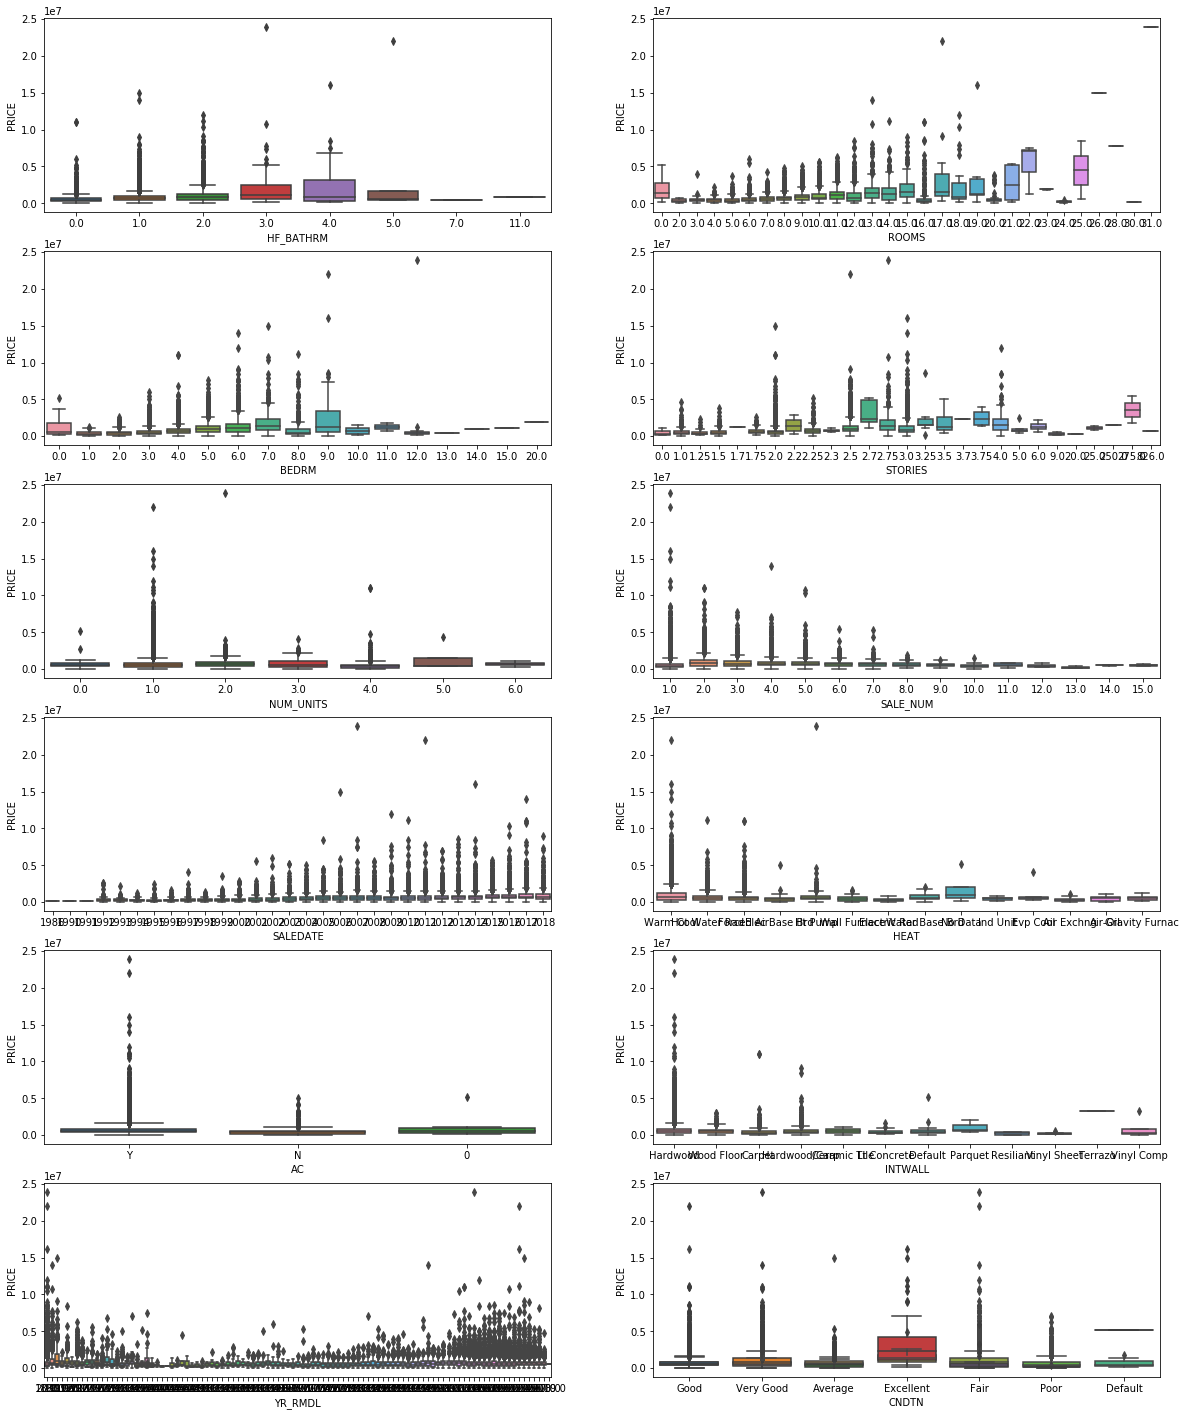

In [8]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(6,2,figsize=(20,25))
sns.boxplot(x='HF_BATHRM', y="PRICE", data=house_info_data, ax=ax[0,0])
sns.boxplot(x='ROOMS', y="PRICE", data=house_info_data, ax=ax[0,1])
sns.boxplot(x='BEDRM', y="PRICE", data=house_info_data, ax=ax[1,0])
sns.boxplot(x='STORIES', y="PRICE", data=house_info_data, ax=ax[1,1])
sns.boxplot(x='NUM_UNITS', y="PRICE", data=house_info_data, ax=ax[2,0])
sns.boxplot(x='SALE_NUM', y="PRICE", data=house_info_data, ax=ax[2,1])
sns.boxplot(x='SALEDATE', y="PRICE", data=house_info_data, ax=ax[3,0])
sns.boxplot(x='HEAT', y="PRICE", data=house_info_data, ax=ax[3,1])
sns.boxplot(x='AC', y="PRICE", data=house_info_data, ax=ax[4,0])
sns.boxplot(x='INTWALL', y="PRICE", data=house_info_data, ax=ax[4,1])
sns.boxplot(x='EXTWALL', y="PRICE", data=house_info_data, ax=ax[5,0])
sns.boxplot(x='ROOF', y="PRICE", data=house_info_data, ax=ax[5,1])
sns.boxplot(x='YR_RMDL', y="PRICE", data=house_info_data, ax=ax[5,0])
sns.boxplot(x='CNDTN', y="PRICE", data=house_info_data, ax=ax[5,1])

After looking at the price distribution of all the attributes, some subtle columns stood out to be interesting. they were interesting because they weren't as obvious as the rooms, units, AC, Heat, or any of the other columns which are a general indication of more price throughout the nations housing market, so we chose 4 different attributes to look at in depth that we think are particular to DC  

The first attribute that we need to pay attention to is the position and the structure of the property. 
 

 
 


 
 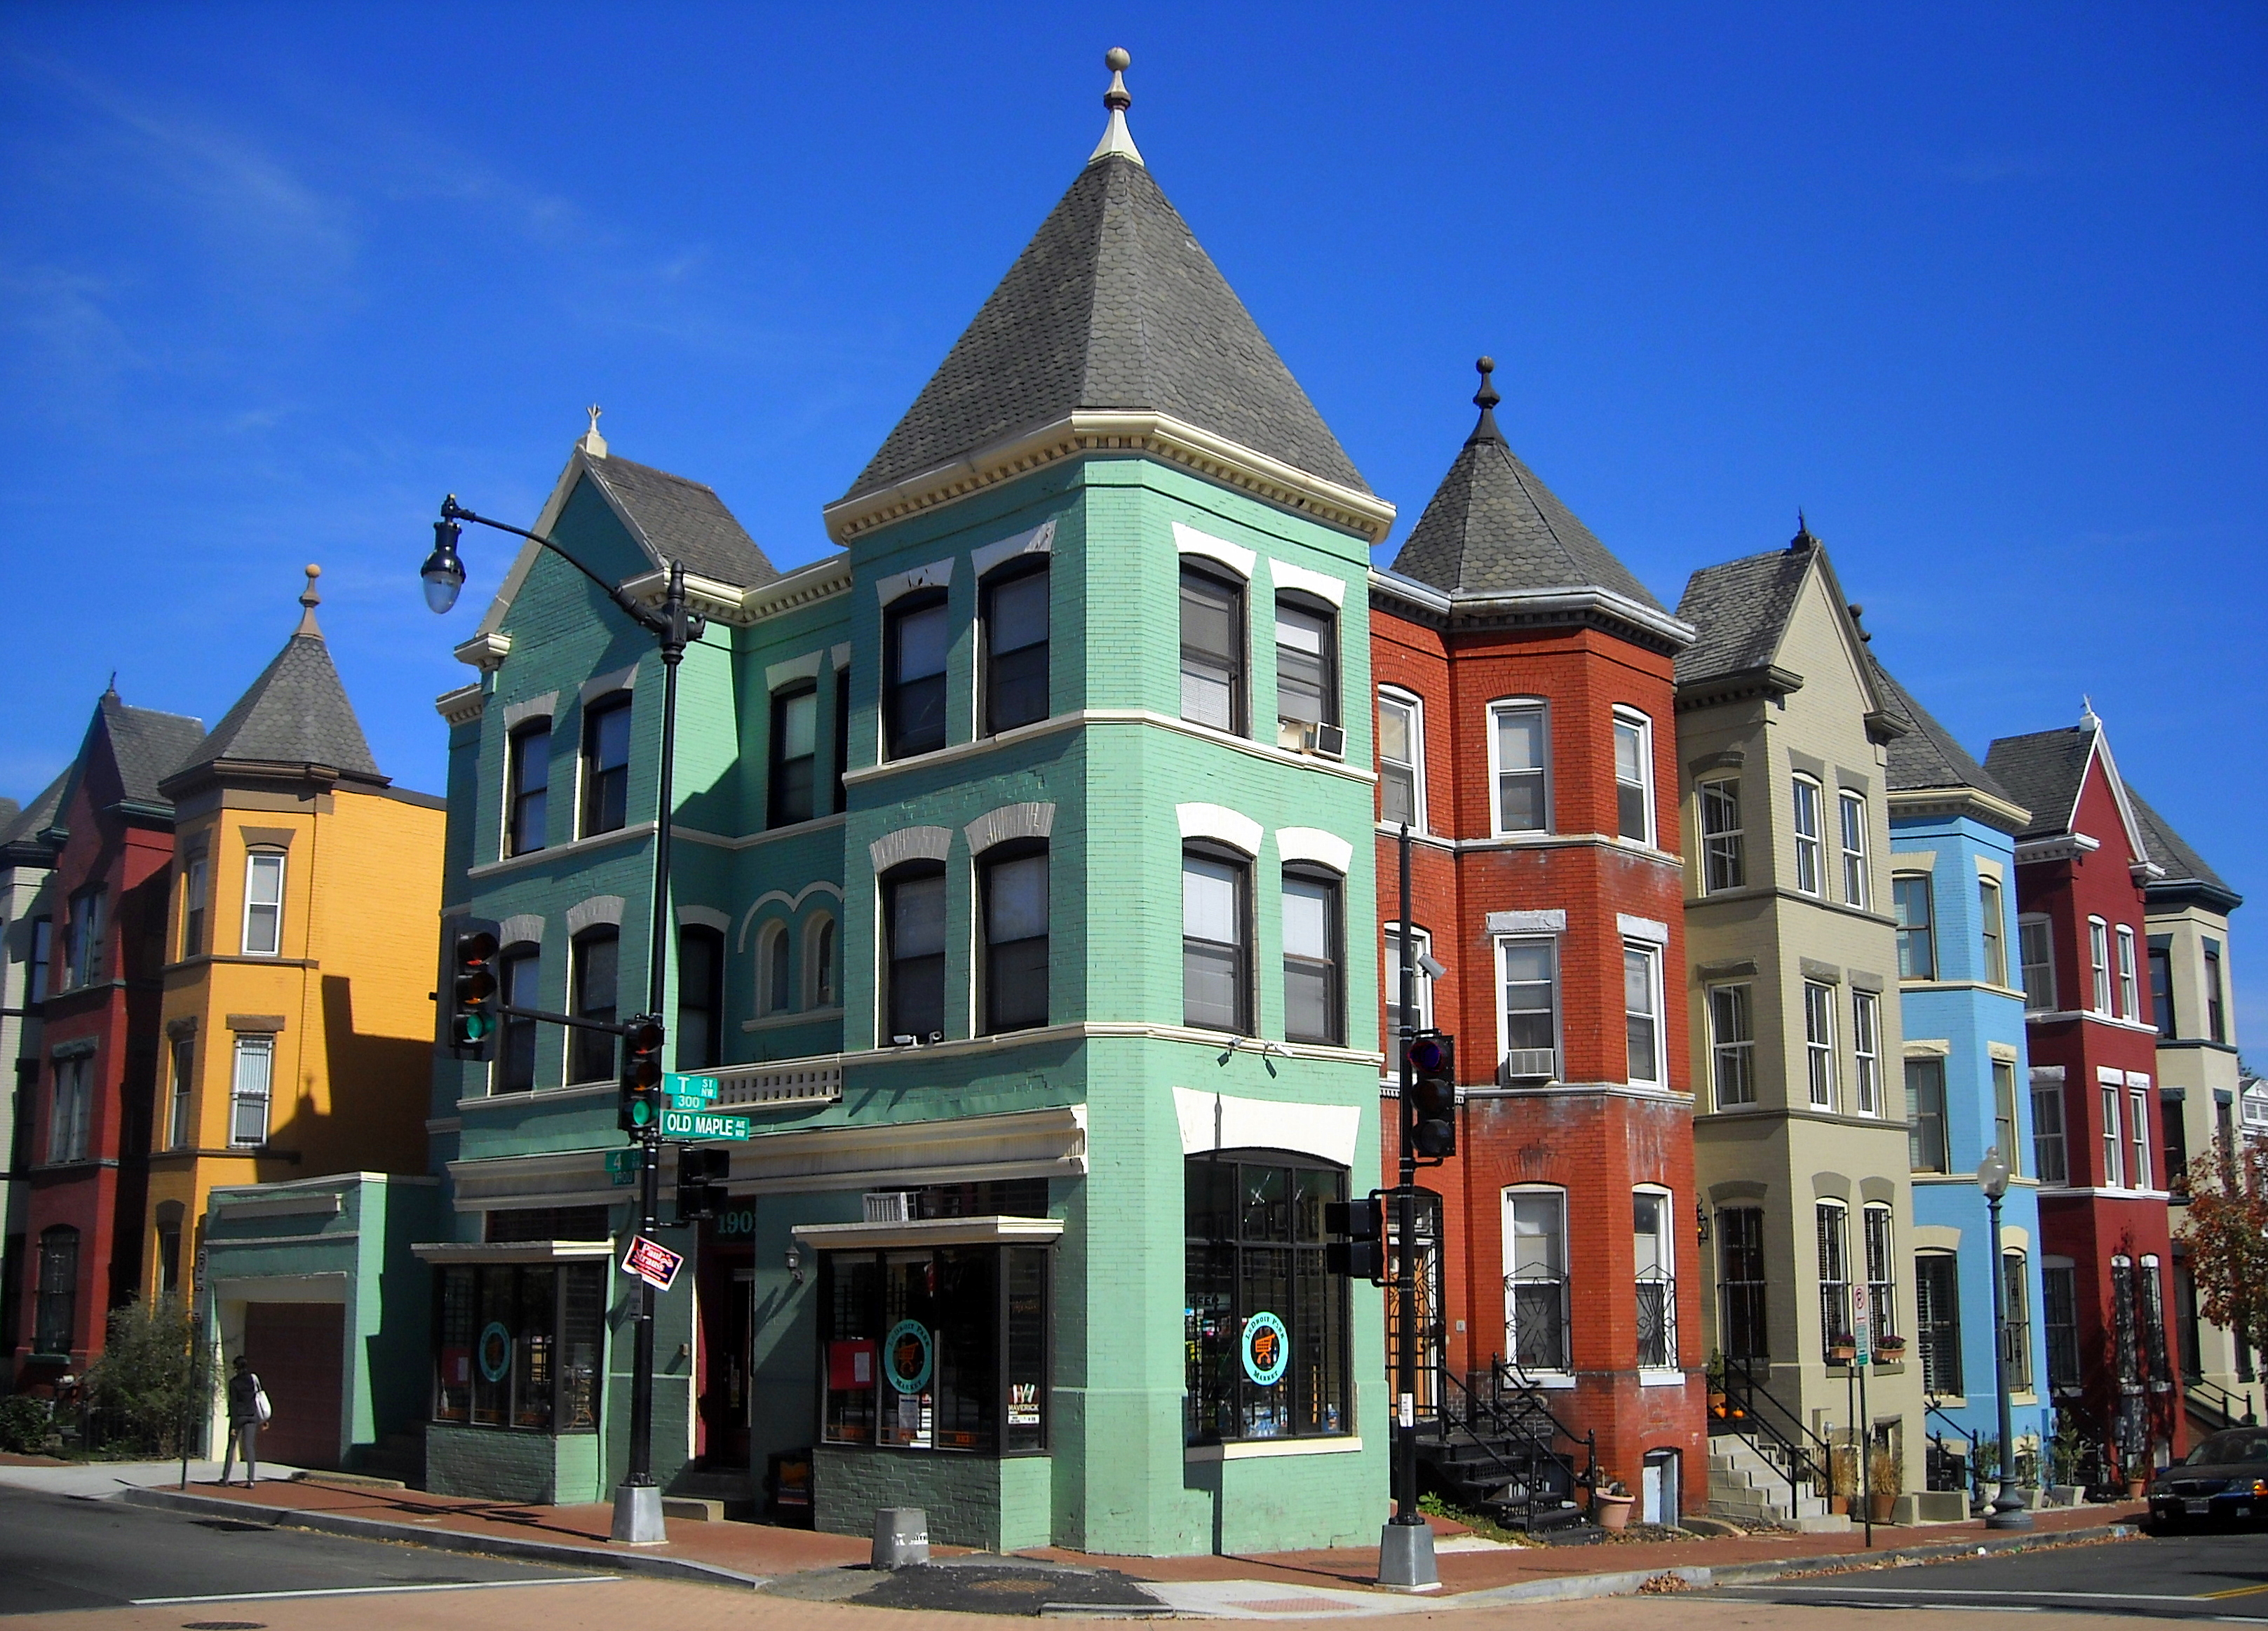
 
 
 
 
 
 <h3>2.3 The DC house structures catagories:</h3>
  
         •Town Inside
         •Town End
         •Single
         •Row Inside
         •Semi-Detached
         •Row End
         •Multi
         •vacant land(dataset DOESNT have a reported price for this )
    
    
then, we calculate the average prices based on the different type of house structure categories 
except for vacant land (which the dataset didn't provide any recorded for )
 
to find out how the attributes affect the price, we created a table for 
the individual structure categories, then we manage to get the average price for each 
particular structure type.

After that, we made a new table that has the structure type and the average price associated with it

finally, we plotted the price averages vs structure type graph.

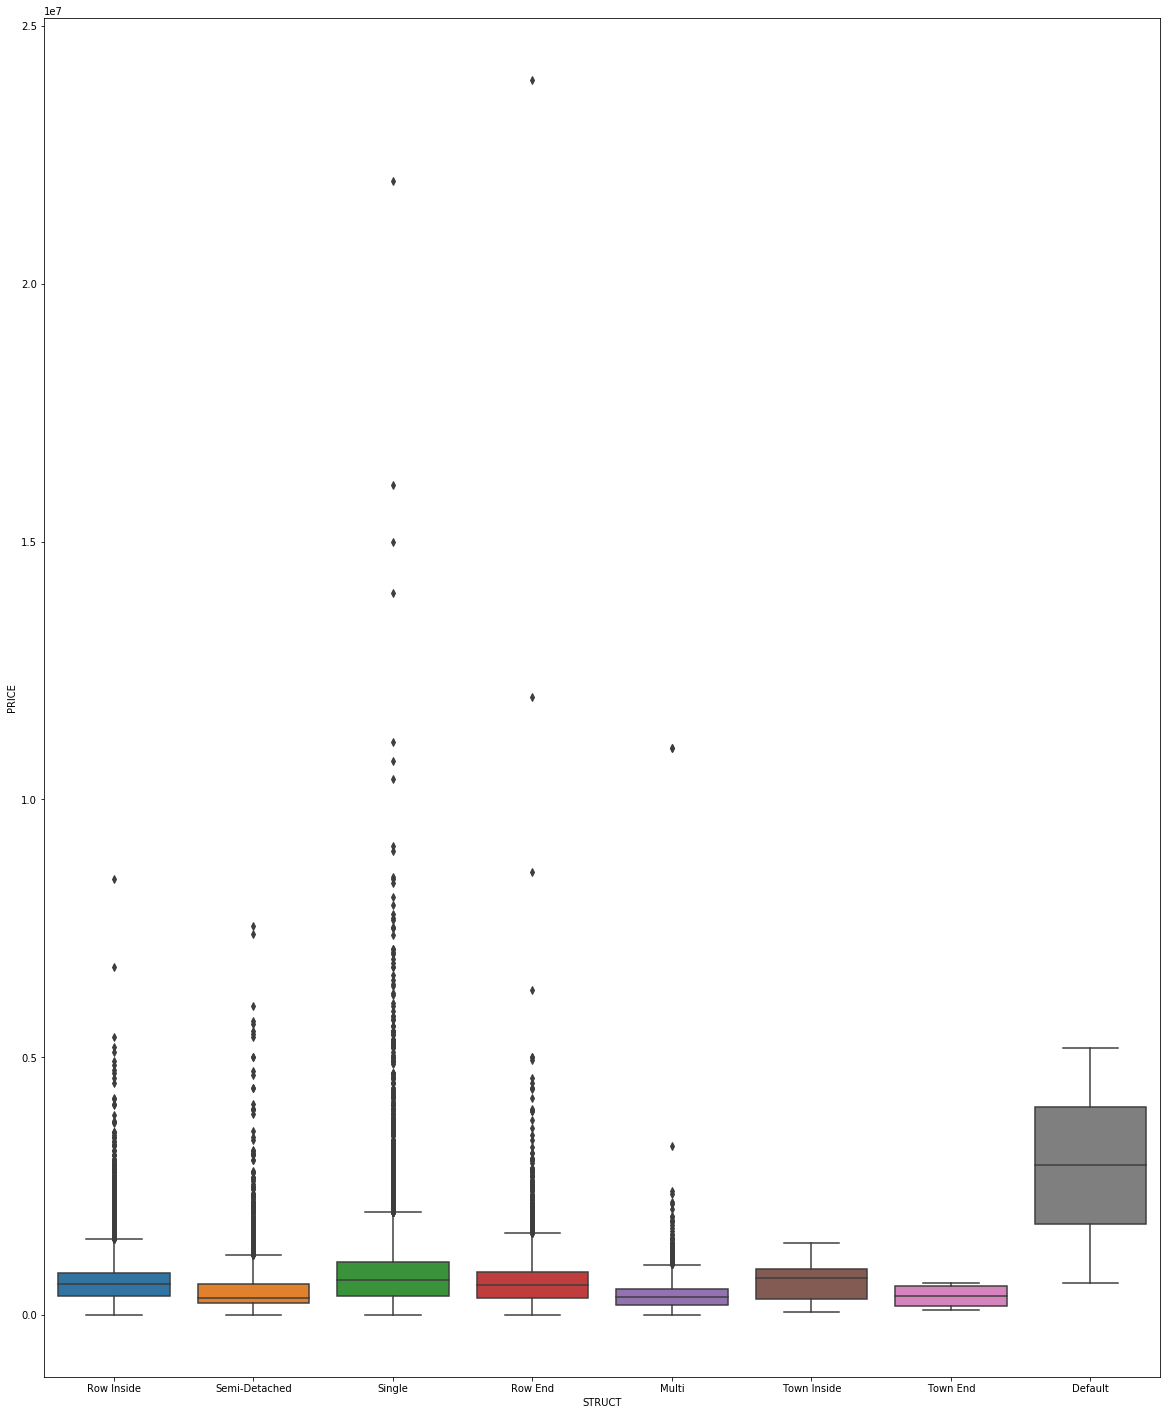

In [9]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(20,25))
sns.boxplot(x='STRUCT', y="PRICE", data=house_info_data)

In [10]:
# this table, has attributes for a single houses in DC
VL_table = house_info_data.loc[house_info_data['STRUCT'] == ('Single')]
VL_table = VL_table[pd.notnull(VL_table["PRICE"])]
single = VL_table['PRICE'].mean()
print("Average price for a single houses in DC:","$",single)

Average price for a single houses in DC: $ 857648.743809


In [11]:
# this table, has attributes for Town Inside houses in DC
VL_table = house_info_data.loc[house_info_data['STRUCT'] == ('Town Inside')]
VL_table = VL_table[pd.notnull(VL_table["PRICE"])]
TownInside = VL_table['PRICE'].mean()
print("Average price for a Town Inside houses in DC:","$",TownInside)

Average price for a Town Inside houses in DC: $ 655517.307692


In [12]:
# this table, has attributes for Row Inside houses in DC
VL_table = house_info_data.loc[house_info_data['STRUCT'] == ('Row Inside')]
VL_table = VL_table[pd.notnull(VL_table["PRICE"])]
RowInside = VL_table['PRICE'].mean()
print("Average price for a Row Inside houses in DC:","$",RowInside)

Average price for a Row Inside houses in DC: $ 653875.450118


In [13]:
# this table, has attributes for Row End houses in DC
VL_table = house_info_data.loc[house_info_data['STRUCT'] == ('Row End')]
VL_table = VL_table[pd.notnull(VL_table["PRICE"])]
RowEnd = VL_table['PRICE'].mean()
print("Average price for a Row End houses in DC:","$",RowEnd)

Average price for a Row End houses in DC: $ 688954.794223


In [14]:
# this table, has attributes for Multi houses in DC
VL_table = house_info_data.loc[house_info_data['STRUCT'] == ('Multi')]
VL_table = VL_table[pd.notnull(VL_table["PRICE"])]
Multi = VL_table['PRICE'].mean()
print("Average price for a Multi houses in DC:","$",Multi)

Average price for a Multi houses in DC: $ 426946.109682


In [15]:
# this table, has attributes for Semi-Detached houses in DC
VL_table = house_info_data.loc[house_info_data['STRUCT'] == ('Semi-Detached')]
VL_table = VL_table[pd.notnull(VL_table["PRICE"])]
Semi_Deta = VL_table['PRICE'].mean()
print("Average price for a Semi-Detached houses in DC:","$",Semi_Deta)

Average price for a Semi-Detached houses in DC: $ 489003.863798


In [16]:
# this table, has attributes for Town Inside houses in DC
VL_table = house_info_data.loc[house_info_data['STRUCT'] == ('Town End')]
VL_table = VL_table[pd.notnull(VL_table["PRICE"])]
TownEnd = VL_table['PRICE'].mean()
print("Average price for a Town Inside houses in DC:","$",TownEnd)

Average price for a Town Inside houses in DC: $ 365442.5


In [17]:
d = {'Structure': ["Single","Town Inside","Town End","Row Inside","Row End","Multi","Semi-Detached"]
     , 'Average': [single,TownInside,TownEnd,RowInside,RowEnd,Multi,Semi_Deta]}
df = pd.DataFrame(data=d)
df

Structure        Average
0         Single  857648.743809
1    Town Inside  655517.307692
2       Town End  365442.500000
3     Row Inside  653875.450118
4        Row End  688954.794223
5          Multi  426946.109682
6  Semi-Detached  489003.863798

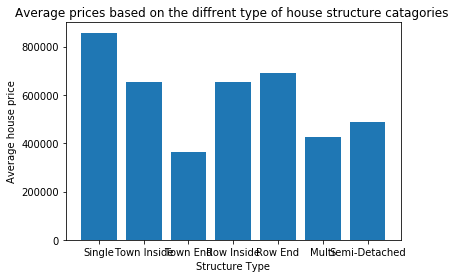

In [18]:
import numpy as np
import matplotlib.pyplot as plt
 
# Make a fake dataset:
height = [single,TownInside,TownEnd,RowInside,RowEnd,Multi,Semi_Deta]
bars = ("Single","Town Inside","Town End","Row Inside","Row End","Multi","Semi-Detached" )
y_pos = np.arange(len(bars))

# Add title and axis names
plt.title('Average prices based on the diffrent type of house structure catagories ')
plt.xlabel('Structure Type')
plt.ylabel('Average house price')
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

an additional attribute that caught our eye was the Qualified category.
 


<h3>but first,</h3>

<h3>2.4 What Is Qualified Property?</h3>

   property is qualified property if it is one of the following.
   
      •	Qualified reuse and recycling property.
      •	Qualified second-generation biofuel plant property.
      •	Certain qualified property acquired before September 28, 2017.
      •	Certain qualified property acquired after September 27, 2017.
      •	Certain plants bearing fruits and nuts.
      
      
      
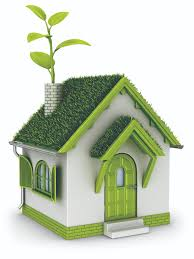
   
   
   
   
If you are curious and want to further understand qualified properties:[Here](https://taxmap.irs.gov/taxmap/pubs/p946-014.htm) is a good link.
      

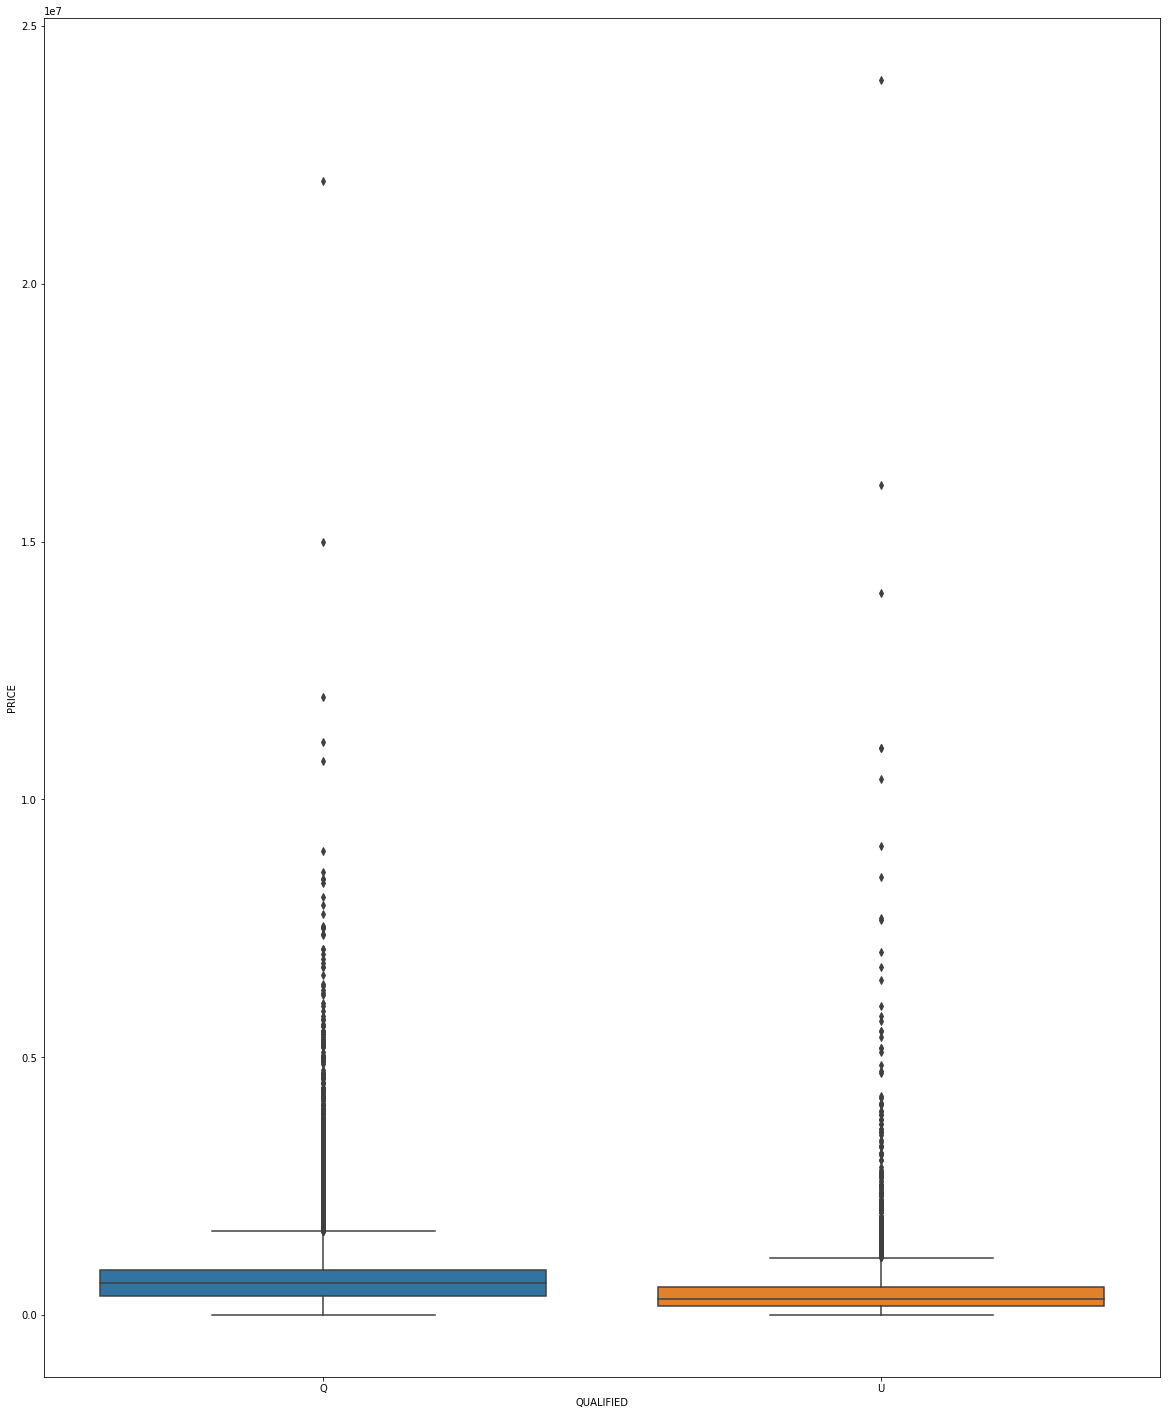

In [19]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(20,25))
sns.boxplot(x='QUALIFIED', y="PRICE", data=house_info_data)

In [20]:
# this table, has attributes for a QUALIFIED houses in DC
ttable1 = house_info_data.loc[house_info_data['QUALIFIED'] == ('Q')]
ttable1 = ttable1[pd.notnull(ttable1["PRICE"])]

Q = ttable1['PRICE'].mean()
print("Average price for a QUALIFIED houses in DC:","$",Q)

Average price for a QUALIFIED houses in DC: $ 726556.640393


In [21]:
# this table, has attributes for a UNQUALIFIED houses in DC
table_2 = house_info_data.loc[house_info_data['QUALIFIED'] == ('U')]
table_2 = table_2[pd.notnull(table_2 ["PRICE"])]

U = table_2['PRICE'].mean()
print("Average price for an UNQUALIFIED houses in DC:","$",U)

Average price for an UNQUALIFIED houses in DC: $ 472184.668396


In [22]:
d = {'Qualified': ["U","Q"]
     , 'Average': [U,Q]}
df = pd.DataFrame(data=d)
df

Qualified        Average
0         U  472184.668396
1         Q  726556.640393

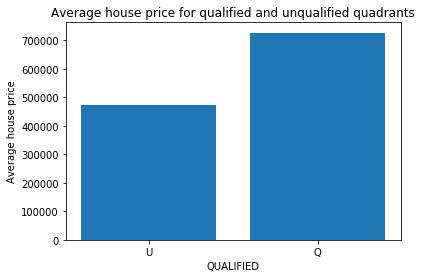

In [23]:
import numpy as np
import matplotlib.pyplot as plt
 
# Make a fake dataset:
height = [U,Q]
bars = ("U","Q")
y_pos = np.arange(len(bars))

# Add title and axis names
plt.title('Average house price for qualified and unqualified quadrants')
plt.xlabel('QUALIFIED')
plt.ylabel('Average house price')
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

# 3. Isolate a House price table

In [24]:
#Create price table
price_data = pd.DataFrame(data[['Unnamed: 0','FULLADDRESS','CITY','STATE','ZIPCODE','SALEDATE','PRICE', \
                                 'NUM_UNITS','SALE_NUM','LATITUDE', 'LONGITUDE','WARD', 'QUADRANT']])
# taking care of  missing data
price_data = price_data.dropna()


price_data.head()

Unnamed: 0           FULLADDRESS        CITY STATE  ZIPCODE  \
0          0  1748 SWANN STREET NW  WASHINGTON    DC  20009.0   
2          2  1744 SWANN STREET NW  WASHINGTON    DC  20009.0   
3          3  1742 SWANN STREET NW  WASHINGTON    DC  20009.0   
5          5      1709 S STREET NW  WASHINGTON    DC  20009.0   
7          7  1746 1/2 T STREET NW  WASHINGTON    DC  20009.0   

              SALEDATE      PRICE NUM_UNITS SALE_NUM     LATITUDE  \
0  2003-11-25 00:00:00  1095000.0       2.0        1  38.91468021   
2  2016-06-21 00:00:00  2100000.0       2.0        3  38.91468351   
3  2006-07-12 00:00:00  1602000.0       2.0        1  38.91468254   
5  2010-02-26 00:00:00  1950000.0       1.0        1  38.91433108   
7  2011-09-29 00:00:00  1050000.0       2.0        1   38.9154077   

      LONGITUDE    WARD QUADRANT  
0  -77.04083204  Ward 2       NW  
2  -77.04067788  Ward 2       NW  
3  -77.04062899  Ward 2       NW  
5  -77.03971453  Ward 2       NW  
7  -77.04012874  Ward 2       NW

In [25]:

#got rid of the null data's because they would interfere  
price_data = price_data[pd.notnull(price_data["LATITUDE"])]
price_data = price_data[pd.notnull(price_data["LATITUDE"])]
price_data["LATITUDE"] = price_data["LATITUDE"].str.replace("(", "").astype(float)
price_data["LONGITUDE"] = price_data["LONGITUDE"].str.replace(")", "").astype(float)

price_data = price_data[pd.notnull(price_data["PRICE"])]
price_data["PRICE"] = price_data["PRICE"].str.replace("(", "").astype(float)


# 3.1 The four Quadrants

Lucky for us, DC is small, and we can effectively use quadrants to analyze its housing market. On top of that when we checked for the completeness of our dataset at the beginning of this tutorial, the quadrant attribute's missing data percentage was close to zero that means we can make a solid analysis and conclusion based on Quadrants.
 
                     
                                    Quadrants:NW,NE,SW,and SE
 
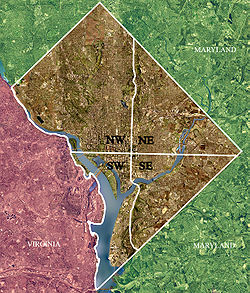

 to find out how the quadrants affect the price, we created a table for the individual quadrants, then we manage to get the average price for each quadrant. 

 After that, we made a new table that has the quadrants and the average price that is associated with it.

 finally, we plotted the price averages vs quadrant graph


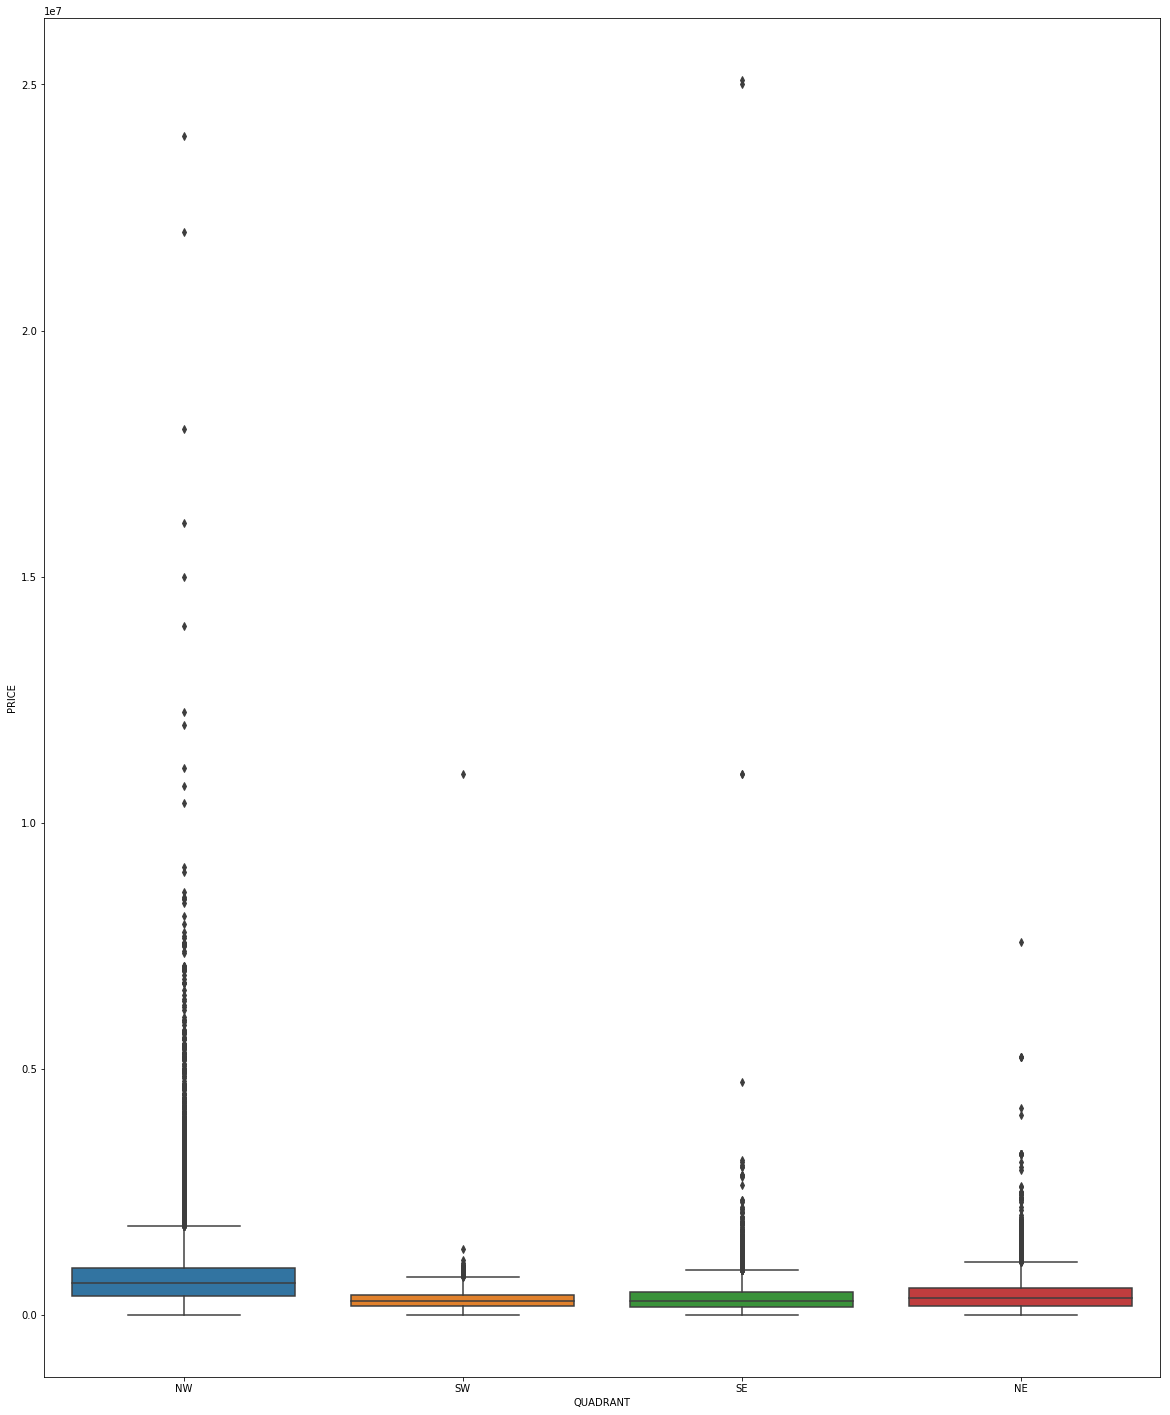

In [26]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(20,25))
sns.boxplot(x='QUADRANT', y="PRICE", data= price_data)

In [27]:
# this table, has attributes that are found only in NW DC
nw_table = price_data.loc[price_data['QUADRANT'] == ('NW')]
nw_table = nw_table[pd.notnull(nw_table["PRICE"])]
NWaverage_price = nw_table['PRICE'].mean()
print("Average house price in NW DC:","$",NWaverage_price)

Average house price in NW DC: $ 788896.27819


In [28]:
# this table, has attributes that are found only in NE DC
ne_table = price_data.loc[price_data['QUADRANT'] == ('NE')]
ne_table = ne_table[pd.notnull(ne_table["PRICE"])]
NEaverage_price = ne_table['PRICE'].mean()
print("Average house price in NE DC:","$",NEaverage_price)

Average house price in NE DC: $ 403011.452514


In [29]:
# this table, has attributes that are found only in SW DC
sw_table = price_data.loc[price_data['QUADRANT'] == ('SW')]
sw_table = sw_table[pd.notnull(sw_table["PRICE"])]
SWaverage_price = sw_table['PRICE'].mean()
print("Average house price in SW DC:","$",SWaverage_price)

Average house price in SW DC: $ 346137.746575


In [30]:
# this table, has attributes that are found only in SE DC
se_table = price_data.loc[price_data['QUADRANT'] == ('SE')]
se_table = se_table[pd.notnull(se_table["PRICE"])]
SEaverage_price = se_table['PRICE'].mean()
print("Average house price in SE DC:","$",SEaverage_price)

Average house price in SE DC: $ 372870.387881


In [31]:
d = {'Quadrant': ["NW","NE","SW","SE" ]
     , 'Average': [NWaverage_price,NEaverage_price,SWaverage_price,SEaverage_price]}
df = pd.DataFrame(data=d)
df

Quadrant        Average
0       NW  788896.278190
1       NE  403011.452514
2       SW  346137.746575
3       SE  372870.387881

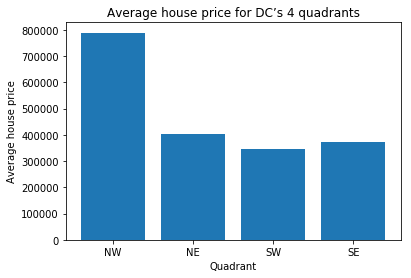

In [32]:
import numpy as np
import matplotlib.pyplot as plt
 
# Make a fake dataset:
height = [NWaverage_price,NEaverage_price,SWaverage_price,SEaverage_price]
bars = ("NW","NE","SW","SE" )
y_pos = np.arange(len(bars))

# Add title and axis names
plt.title('Average house price for DC’s 4 quadrants')
plt.xlabel('Quadrant')
plt.ylabel('Average house price')
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()


# 3.2 The eight Wards

Quadrants are good ways of dividing the city, but wards are even better.

Neighborhoods in Washington, DC, are distinguished by their history, culture, architecture, demographics, and geography. There are 8 wards in DC and the 131 neighborhoods in the district are included in them. 


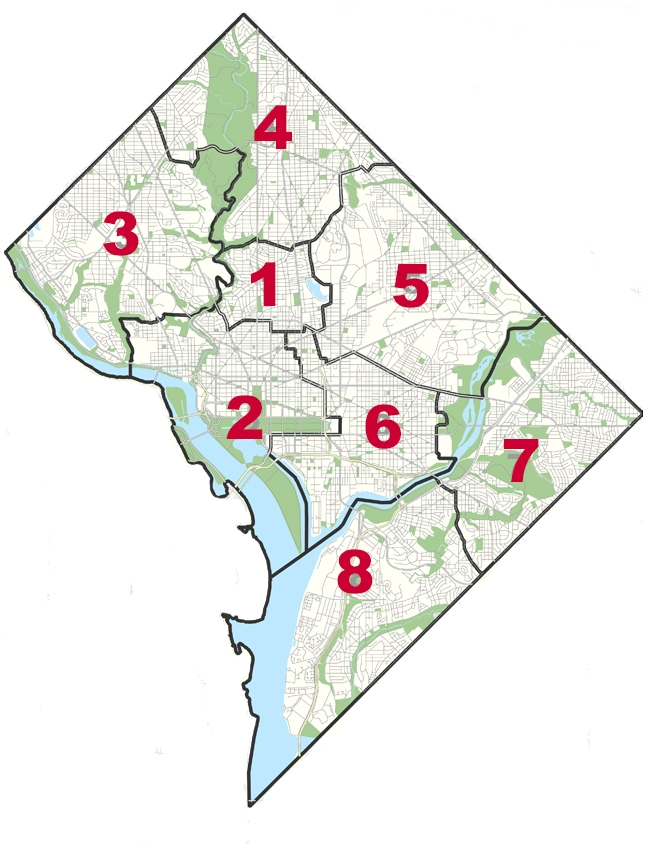

Just like the above, to find out how the wards affect the price, we created a table for the individual wards, then we manage to get the average price for each of them. 

After that, we made a new table that has the wards and the average price associated with it.

finally, we plotted the price averages vs ward graph

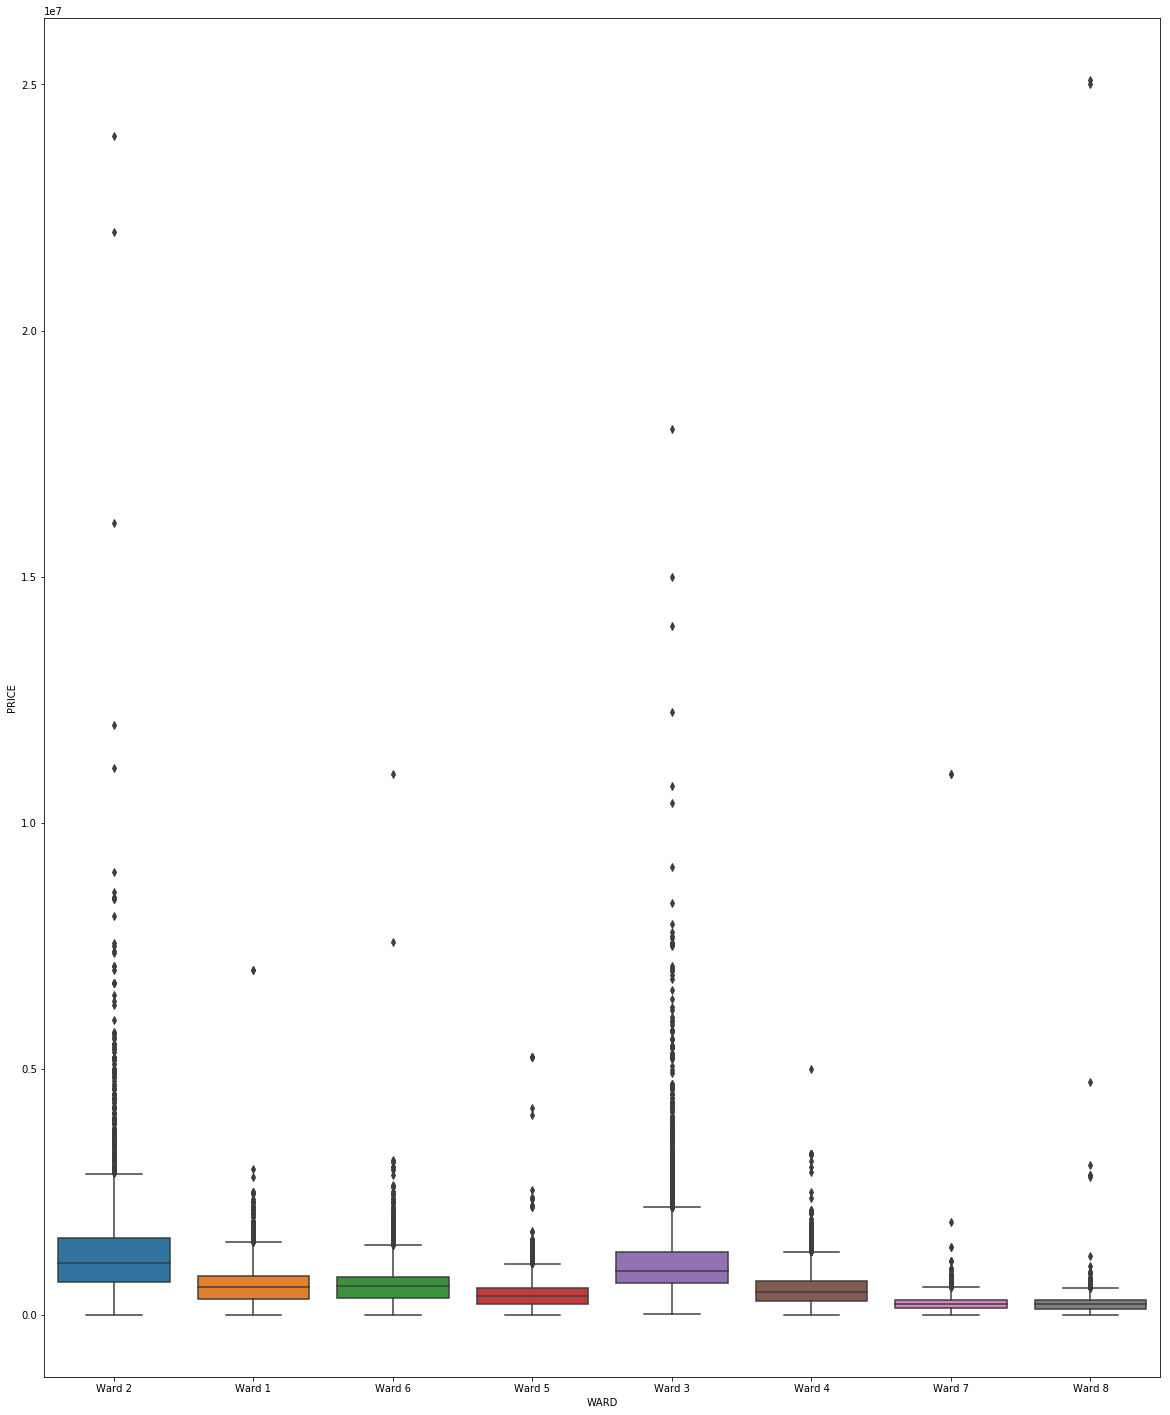

In [33]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(20,25))
sns.boxplot(x='WARD', y="PRICE", data= price_data)

In [34]:
# this table, has attributes that are found only in ward 1  DC
tableW1 = price_data.loc[price_data['WARD'] == ('Ward 1')]
tableW1 = tableW1[pd.notnull(tableW1["PRICE"])]

W1_price = tableW1['PRICE'].mean()
print("Average house price in Ward 1 DC:","$",W1_price)

Average house price in Ward 1 DC: $ 596502.077653


In [35]:
# this table, has attributes that are found only in ward 2  DC
tableW2 = price_data.loc[price_data['WARD'] == ('Ward 2')]
tableW2 = tableW2[pd.notnull(tableW2["PRICE"])]

W2_price = tableW2['PRICE'].mean()
print("Average house price in Ward 2 DC:","$",W2_price)

Average house price in Ward 2 DC: $ 1303086.04285


In [36]:
# this table, has attributes that are found only in ward 3  DC
tableW3 = price_data.loc[price_data['WARD'] == ('Ward 3')]
tableW3= tableW3[pd.notnull(tableW3["PRICE"])]

W3_price = tableW3['PRICE'].mean()
print("Average house price in Ward 3 DC:","$",W3_price)

Average house price in Ward 3 DC: $ 1071078.18529


In [37]:
# this table, has attributes that are found only in ward 4  DC
tableW4 = price_data.loc[price_data['WARD'] == ('Ward 4')]
tableW4 = tableW4[pd.notnull(tableW4["PRICE"])]

W4_price = tableW4['PRICE'].mean()
print("Average house price in Ward 4 DC:","$",W4_price)

Average house price in Ward 4 DC: $ 505945.350527


In [38]:
# this table, has attributes that are found only in ward 5  DC
tableW5 = price_data.loc[price_data['WARD'] == ('Ward 5')]
tableW5 = tableW5[pd.notnull(tableW5["PRICE"])]

W5_price = tableW5['PRICE'].mean()
print("Average house price in Ward 5 DC:","$",W5_price)

Average house price in Ward 5 DC: $ 409262.468984


In [39]:
# this table, has attributes that are found only in ward 6  DC
tableW6 = price_data.loc[price_data['WARD'] == ('Ward 6')]
tableW6 = tableW6[pd.notnull(tableW6["PRICE"])]

W6_price = tableW6['PRICE'].mean()
print("Average house price in Ward 6 DC:","$",W6_price)

Average house price in Ward 6 DC: $ 598711.963921


In [40]:
# this table, has attributes that are found only in ward 7  DC
tableW7 = price_data.loc[price_data['WARD'] == ('Ward 7')]
tableW7 = tableW7[pd.notnull(tableW7["PRICE"])]

W7_price = tableW7['PRICE'].mean()
print("Average house price in Ward 7 DC:","$",W7_price)

Average house price in Ward 7 DC: $ 235630.565217


In [41]:
# this table, has attributes that are found only in ward 8  DC
tableW8 = price_data.loc[price_data['WARD'] == ('Ward 8')]
tableW8 = tableW8[pd.notnull(tableW8["PRICE"])]

W8_price = tableW8['PRICE'].mean()
print("Average house price in Ward 8 DC:","$",W8_price)

Average house price in Ward 8 DC: $ 241265.164025


In [42]:
d = {'Ward': [ "Ward 1","Ward 2","Ward 3","Ward 4", "Ward 5","Ward 6","Ward 7","Ward 8" ]
     , 'Average': [ W1_price,W2_price,W3_price,W4_price,W5_price,W6_price,W7_price,W8_price ]}
dff = pd.DataFrame(data=d)
dff

Ward       Average
0  Ward 1  5.965021e+05
1  Ward 2  1.303086e+06
2  Ward 3  1.071078e+06
3  Ward 4  5.059454e+05
4  Ward 5  4.092625e+05
5  Ward 6  5.987120e+05
6  Ward 7  2.356306e+05
7  Ward 8  2.412652e+05

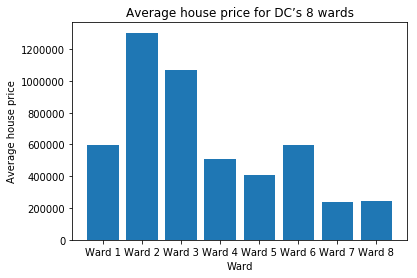

In [43]:
import numpy as np
import matplotlib.pyplot as plt
 
# Make a fake dataset:
height = [W1_price,W2_price,W3_price,W4_price,W5_price,W6_price,W7_price,W8_price ]
bars = ("Ward 1","Ward 2","Ward 3","Ward 4", "Ward 5","Ward 6","Ward 7","Ward 8" )
y_pos = np.arange(len(bars))

# Add title and axis names
plt.title('Average house price for DC’s 8 wards')
plt.xlabel('Ward')
plt.ylabel('Average house price')
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

In [44]:
locations = price_data[['LATITUDE', 'LONGITUDE']]
locationlist = locations.values.tolist()
print("Number of properties:",len(locationlist))
map = folium.Map(location=[38.9146833, -77.04076447], zoom_start=12)


Number of properties: 57463


# 4 Interactive Map

In [45]:
import random

properties = []
index = 0

# Adding layers to the map
quadrant_of_the_property = FeatureGroup(name='QUADRANT')
Numunits_of_the_property = FeatureGroup(name='NUM_UNITS')

# Generating Random Sample between 0 and 250
while index < 500:
    rand = random.randint(0, len(price_data['FULLADDRESS']))
    if rand not in properties:
        index += 1
        properties.append(rand)
        
# Markers for quadrants
# Markers are colored to identify the quadrant of the city
for i in properties:
    # Blue Markers: NW
    if price_data['QUADRANT'].values[i] == 'NW':
        quadrant_of_the_property.add_child(folium.Marker(
            location=[price_data['LATITUDE'].values[i],price_data['LONGITUDE'].values[i]],
            popup= "Full Address: "+ str(price_data['FULLADDRESS'].values[i]) 
            + " " + price_data['CITY'].values[i] 
            + ", " + str(price_data['STATE'].values[i])
            + " " + str(price_data['ZIPCODE'].values[i])
            + " Price:$" + str(price_data['PRICE'].values[i])
            + " Sale Date: " + str(price_data['SALEDATE'].values[i]),
            icon=folium.Icon(color='blue'),
        ))
     # Red Markers : NE
    elif price_data['QUADRANT'].values[i] == 'NE':
        quadrant_of_the_property.add_child(folium.Marker(
            location=[price_data['LATITUDE'].values[i],price_data['LONGITUDE'].values[i]],
            popup= "Full Address: "+ str(price_data['FULLADDRESS'].values[i]) 
            + " " + price_data['CITY'].values[i] 
            + ", " + str(price_data['STATE'].values[i])
            + " " + str(price_data['ZIPCODE'].values[i])
            + " Price:$" + str(price_data['PRICE'].values[i])
            + " Sale Date: " + str(price_data['SALEDATE'].values[i]),
            icon=folium.Icon(color='red'),
        ))
        # Green Markers : SW
    elif price_data['QUADRANT'].values[i] == 'SW':
        quadrant_of_the_property.add_child(folium.Marker(
            location=[price_data['LATITUDE'].values[i],price_data['LONGITUDE'].values[i]],
            popup= "Full Address: "+ str(price_data['FULLADDRESS'].values[i]) 
            + " " + price_data['CITY'].values[i] 
            + ", " + str(price_data['STATE'].values[i])
            + " " + str(price_data['ZIPCODE'].values[i])
            + " Price:$" + str(price_data['PRICE'].values[i])
            + " Sale Date: " + str(price_data['SALEDATE'].values[i]),
            icon=folium.Icon(color='green'),
        ))
         # Black Markers : SE
    elif price_data['QUADRANT'].values[i] == 'SE':
        quadrant_of_the_property.add_child(folium.Marker(
            location=[price_data['LATITUDE'].values[i],price_data['LONGITUDE'].values[i]],
            popup= "Full Address: "+ str(price_data['FULLADDRESS'].values[i]) 
            + " " + price_data['CITY'].values[i] 
            + ", " + str(price_data['STATE'].values[i])
            + " " + str(price_data['ZIPCODE'].values[i])
            + " Price:$" + str(price_data['PRICE'].values[i])
            + " Sale Date: " + str(price_data['SALEDATE'].values[i]),
            icon=folium.Icon(color='black'),
        ))
        
    
# circles with colors indicating number of units
# 1 unit - Purple, 2 units - Orange, 3 units - Yellow,4 units - White
for i in properties:
    if price_data['NUM_UNITS'].values[i] == '1.0':
        Numunits_of_the_property.add_child(folium.Circle(
            radius=100,
            location=[price_data['LATITUDE'].values[i],price_data['LONGITUDE'].values[i]],
            popup="Number of Units : " + str(price_data['NUM_UNITS'].values[i]),
            color='purple',
            fill=True,
        ))
    elif price_data['NUM_UNITS'].values[i] == '2.0':
        Numunits_of_the_property.add_child(folium.Circle(
            radius=100,
            location=[price_data['LATITUDE'].values[i],price_data['LONGITUDE'].values[i]],
            popup="Number of Units : " + str(price_data['NUM_UNITS'].values[i]),
            color='orange',
            fill=True,
        ))
    elif price_data['NUM_UNITS'].values[i] == '3.0':
        Numunits_of_the_property.add_child(folium.Circle(
            radius=100,
            location=[price_data['LATITUDE'].values[i],price_data['LONGITUDE'].values[i]],
            popup="Number of Units : " + str(price_data['NUM_UNITS'].values[i]),
            color='yellow',
            fill=True,
        ))
    elif price_data['NUM_UNITS'].values[i] == '4.0':
        Numunits_of_the_property.add_child(folium.Circle(
            radius=100,
            location=[price_data['LATITUDE'].values[i],price_data['LONGITUDE'].values[i]],
            popup="Number of Units : " + str(price_data['NUM_UNITS'].values[i]),
            color='White',
            fill=True,
        ))
    

# Incorportating layers: quadrant , number of units
map.add_child(quadrant_of_the_property)
map.add_child(Numunits_of_the_property)
map.add_child(folium.map.LayerControl())


# Embed the map
import os
from IPython.core.display import HTML
map.save(os.path.join('Interactive_map.html'))
map

# 5. Regression and Testing 

In [46]:
# Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import pyplot

In [47]:
#Reading into dataframe df
df=pd.read_csv("DC_Properties.csv",dtype=object)
df=df.iloc[:,1:len(df.columns)]
len(df.iloc[:,1])

158957

In [48]:
#Finding percentage null in each column & 
#missing_value=df.isnull().sum()*100/len(df.iloc[:,1])
#print(missing_value)

#Removing rows for which price is null
unknown_data = df[df['PRICE'].isnull()==True]
print(len(unknown_data))
#unknown_data.head()

60741


In [49]:
#Removing rows for which price is known
df = df[df['PRICE'].isnull()==False]
df.head(2)

BATHRM HF_BATHRM           HEAT AC NUM_UNITS ROOMS BEDRM     AYB YR_RMDL  \
0      4         0      Warm Cool  Y       2.0     8     4  1910.0  1988.0   
2      3         1  Hot Water Rad  Y       2.0     9     5  1910.0  2009.0   

    EYB   ...        LONGITUDE ASSESSMENT_NBHD ASSESSMENT_SUBNBHD  \
0  1972   ...     -77.04083204      Old City 2   040 D Old City 2   
2  1984   ...     -77.04067788      Old City 2   040 D Old City 2   

  CENSUS_TRACT CENSUS_BLOCK    WARD SQUARE                   X  \
0       4201.0  004201 2006  Ward 2   0152  -77.04042907495098   
2       4201.0  004201 2006  Ward 2   0152  -77.04042907495098   

                    Y QUADRANT  
0  38.914881109044266       NW  
2  38.914881109044266       NW  

[2 rows x 48 columns]

In [50]:
#Finding percentage null in each column
missing_value=df.isnull().sum()*100/len(df.iloc[:,1])
#print(missing_value)

In [51]:
#Removing column names with more than 20% missing data
non_null_data=[]
for index in range(0, len(missing_value)):
        if(missing_value[index]<20):
            non_null_data.append(missing_value.index[index])

#Non-null dataframe
df=df[non_null_data]

#Finding percentage null in each column & 
missing_value=df.isnull().sum()*100/len(df.iloc[:,1])
#print(missing_value)

In [52]:
#Removing rows with null values
df=df.dropna(subset=non_null_data)

#Finding percentage null in each column
missing_value=df.isnull().sum()*100/len(df.iloc[:,1])
#print(missing_value)

In [53]:
#Removing rows with null values
df=df.dropna(subset=non_null_data)

#Finding percentage null in each column
missing_value=df.isnull().sum()*100/len(df.iloc[:,1])
#print(missing_value)

In [54]:
#Remove duplicate rows
df=df.drop_duplicates()
len(df)

97354

In [55]:
#Modifying data types
df['EYB']=pd.to_datetime(df['EYB'], format='%Y').dt.year
df['SALEDATE']=pd.to_datetime(df['SALEDATE']).dt.year
df.head(2)
df = df[pd.notnull(df["AYB"])]
df["AYB"] = df["AYB"].str.replace("(", "").astype(float)

df['AYB']=pd.to_datetime(np.int16(df['AYB']), format='%Y')
df['AYB']=df['AYB'].dt.year

In [56]:
#Drop Columns
df=df.drop(['GIS_LAST_MOD_DTTM'], axis=1)#Single Value Data
df=df.drop(['X','Y'], axis=1)#Repetitive Data
df=df.drop(['BLDG_NUM'],axis=1)#Single Value Data
df=df.drop(['SQUARE'],axis=1)#No trend in data
df=df.drop(['AYB'],axis=1)#No trend
df=df.drop(['CENSUS_TRACT'],axis=1)#Nominal data
df=df.drop(['LATITUDE','LONGITUDE'],axis=1)#Zipcode denotes the location


In [57]:
df=df.reset_index(drop=True)

In [58]:
df = df[pd.notnull(df["FIREPLACES"])]
df["FIREPLACES"] = df["FIREPLACES"].str.replace("(", "").astype(float)
df=df[df['FIREPLACES']<200]

In [59]:

def outlierindex(a):
    li=[]
    #find q1
    q1=np.percentile(a, 25)
    #find q2
    q3=np.percentile(a, 75)
    #find iqr
    iqr=q3-q1
    #Outlier range
    #lower fence=q1-1.5iqr
    lf=q1-1.5*iqr
    #upper fence=q3+1.5∗iqr
    uf=q3+1.5*iqr
    #index of outliers
    for i in range(0, len(a)):
        if((a[i]<=lf) or (a[i]>=uf)):
        #print(a[i])
            li.append(i)
    return (li)

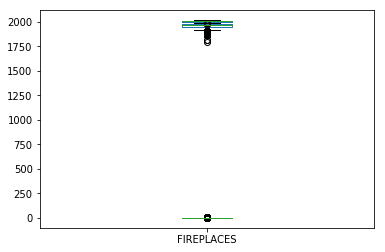

In [60]:
#Plotting boxplot for numeric data
nndf=df.select_dtypes(exclude=['object'])
for i in range(0, len(nndf.columns)):
    nndf[nndf.columns[i]].plot.box()
plt.show()

In [61]:
df = df[pd.notnull(df["PRICE"])]
df["PRICE"] = df["PRICE"].str.replace("(", "").astype(float)


df.groupby('QUADRANT')['PRICE'].mean().index

Index(['NE', 'NW', 'SE', 'SW'], dtype='object', name='QUADRANT')

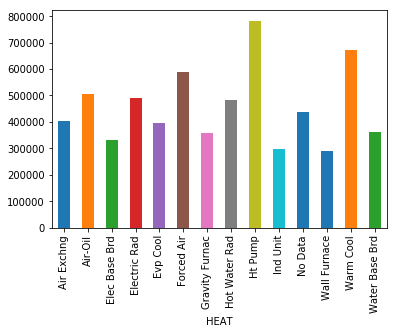

In [62]:
df.groupby('HEAT')['PRICE'].mean().plot.bar()

In [63]:
encoding={'HEAT':{'Air Exchng':1, 'Air-Oil':2, 'Elec Base Brd':1, 'Electric Rad':2, 'Evp Cool':1,
       'Forced Air':2, 'Gravity Furnac':1, 'Hot Water Rad':1, 'Ht Pump':3, 'Ind Unit':1,
       'No Data':0, 'Wall Furnace':1, 'Warm Cool':2, 'Water Base Brd':1}}
df.replace(encoding, inplace=True)

In [64]:
encoding={'AC':{'0':1, 'N':1, 'Y':2}}
df.replace(encoding, inplace=True)

In [65]:
encoding={'QUALIFIED':{'Q':1, 'U':2}}
df.replace(encoding, inplace=True)

In [66]:
encoding={'USECODE':{11:1, 12:1, 13:1, 15:1, 16:1, 17:1, 19:2, 23:1, 24:1, 39:2, 116:1, 117:1}}
df.replace(encoding, inplace=True)

In [67]:
encoding={'SOURCE':{'Condominium':2, 'Residential':1}}
df.replace(encoding, inplace=True)

In [68]:
encoding={'ZIPCODE':{20001.0:3, 20002.0:2, 20003.0:3, 20004.0:2, 20005.0:5, 20006.0:1, 20007.0:4,
              20008.0:4, 20009.0:3, 20010.0:3, 20011.0:2, 20012.0:2, 20015.0:4, 20016.0:5,
              20017.0:2, 20018.0:2, 20019.0:1, 20020.0:1, 20024.0:2, 20032.0:1, 20036.0:2,
              20037.0:3, 20052.0:3, 20392.0:2}}
df.replace(encoding, inplace=True)


In [69]:
encoding={'ASSESSMENT_NBHD':{'16th Street Heights':2, 'American University':2, 'Anacostia':1,
       'Barry Farms':1, 'Berkley':4, 'Brentwood':1, 'Brightwood':1, 'Brookland':1,
       'Burleith':2, 'Capitol Hill':2, 'Central-tri 1':2, 'Central-tri 3':4,
       'Chevy Chase':2, 'Chillum':1, 'Cleveland Park':4, 'Colonial Village':2,
       'Columbia Heights':1, 'Congress Heights':1, 'Crestwood':2, 'Deanwood':1,
       'Eckington':1, 'Foggy Bottom':1, 'Forest Hills':2, 'Fort Dupont Park':1,
       'Fort Lincoln':1, 'Foxhall':2, 'Garfield':2, 'Georgetown':3, 'Glover Park':1,
       'Hawthorne':2, 'Hillcrest':1, 'Kalorama':2, 'Kent':3, 'Ledroit Park':2,
       'Lily Ponds':1, 'Marshall Heights':1, 'Massachusetts Avenue Heights':4,
       'Michigan Park':1, 'Mt. Pleasant':2, 'North Cleveland Park':2,
       'Observatory Circle':2, 'Old City 1':2, 'Old City 2':2, 'Palisades':2,
       'Petworth':1, 'Randle Heights':1, 'Riggs Park':1, 'Shepherd Heights':2,
       'Southwest Waterfront':1, 'Spring Valley':3, 'Takoma Park':1, 'Trinidad':1,
       'Wakefield':2, 'Wesley Heights':2, 'Woodley':3, 'Woodridge':1}}
df.replace(encoding, inplace=True)


In [70]:
encoding={'WARD':{'Ward 1':2, 'Ward 2':3, 'Ward 3':3, 'Ward 4':2, 'Ward 5':2, 'Ward 6':2, 'Ward 7':1,
       'Ward 8':1}}
df.replace(encoding, inplace=True)

In [71]:
encoding={'QUADRANT':{'NE':1, 'NW':2, 'SE':1, 'SW':1}}
df.replace(encoding, inplace=True)



In [72]:
df.head()

BATHRM HF_BATHRM  HEAT  AC ROOMS BEDRM   EYB  SALEDATE      PRICE  \
0      4         0     2   2     8     4  1972      2003  1095000.0   
1      3         1     1   2     9     5  1984      2016  2100000.0   
2      3         1     1   2     8     5  1984      2006  1602000.0   
3      3         2     1   2    10     5  1972      2010  1950000.0   
4      3         1     1   2     8     4  1972      2011  1050000.0   

   QUALIFIED SALE_NUM  FIREPLACES USECODE LANDAREA  SOURCE  ZIPCODE  \
0          1        1         5.0      24     1680       1  20009.0   
1          1        3         4.0      24     1680       1  20009.0   
2          1        1         3.0      24     1680       1  20009.0   
3          1        1         4.0      11     2196       1  20009.0   
4          1        1         1.0      24     1627       1  20009.0   

   ASSESSMENT_NBHD  WARD  QUADRANT  
0                2     3         2  
1                2     3         2  
2                2     3         2  
3                2     3         2  
4                2     3         2

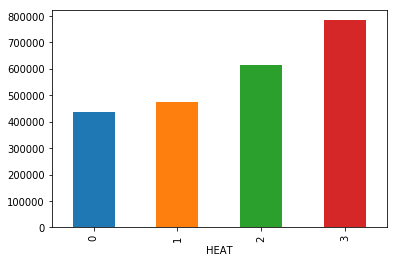

In [73]:
df.groupby('HEAT')['PRICE'].mean().plot.bar()

In [74]:
df['LOGPRICE']=np.log(df['PRICE'])

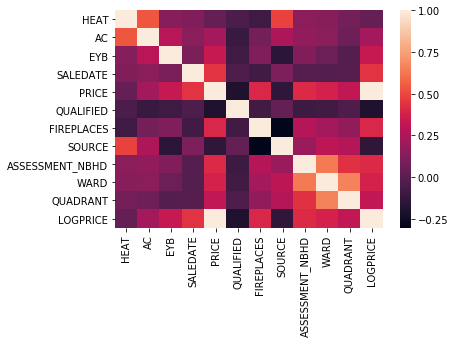

In [75]:
sns.heatmap(df.corr(method='spearman'))


In [76]:
ndf=df

In [77]:
X=ndf.drop(['PRICE','LOGPRICE'], axis=1)
Y=ndf['LOGPRICE']

In [78]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8 , random_state=100)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [79]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
print(lm.intercept_)
print(lm.coef_)

-72.446951585
[  1.50343637e-01   1.32207253e-01  -3.37180414e-03   1.33614460e-01
   1.02054012e-02   8.04292869e-02   1.84572859e-03   6.23357102e-02
  -2.19985577e-01  -4.23109023e-02   1.39594540e-01  -8.33983953e-03
  -1.94898959e-06  -2.98082224e-02  -2.25501085e-03   1.49696883e-01
   3.02231867e-01   1.46243604e-01]


In [81]:
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

Coefficient
BATHRM              0.150344
HF_BATHRM           0.132207
HEAT               -0.003372
AC                  0.133614
ROOMS               0.010205
BEDRM               0.080429
EYB                 0.001846
SALEDATE            0.062336
QUALIFIED          -0.219986
SALE_NUM           -0.042311
FIREPLACES          0.139595
USECODE            -0.008340
LANDAREA           -0.000002
SOURCE             -0.029808
ZIPCODE            -0.002255
ASSESSMENT_NBHD     0.149697
WARD                0.302232
QUADRANT            0.146244

In [82]:
Y_pred = lm.predict(X_train)

In [83]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_train, Y_pred)
r_squared = r2_score(Y_train, Y_pred)

In [84]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.252258936817
r_square_value : 0.641389784134


In [85]:
nndf=pd.DataFrame(Y_train)
nndf['PRED']=Y_pred
nndf=nndf.reset_index(drop=True)

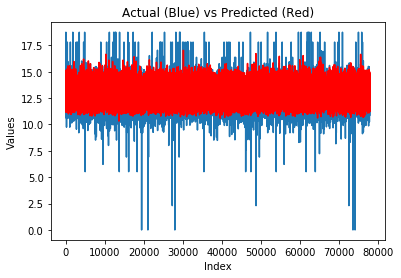

In [86]:
#Plotting the actual vs predicted values
plt.plot(nndf.index,nndf['LOGPRICE'])
plt.plot(nndf.index,nndf['PRED'], color='red')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual (Blue) vs Predicted (Red)')
plt.show()

In [87]:
import statsmodels.api as sm

X_train_sm = X_train 
X_train_sm = sm.add_constant(X_train_sm)

lm_sm = sm.OLS(Y_train, X_train_sm.astype(float)).fit()
 
lm_sm.params

const             -72.446952
BATHRM              0.150344
HF_BATHRM           0.132207
HEAT               -0.003372
AC                  0.133614
ROOMS               0.010205
BEDRM               0.080429
EYB                 0.001846
SALEDATE            0.062336
QUALIFIED          -0.219986
SALE_NUM           -0.042311
FIREPLACES          0.139595
USECODE            -0.008340
LANDAREA           -0.000002
SOURCE             -0.029808
ZIPCODE            -0.002255
ASSESSMENT_NBHD     0.149697
WARD                0.302232
QUADRANT            0.146244
dtype: float64

In [88]:
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:               LOGPRICE   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     7736.
Date:                Sat, 15 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:25:01   Log-Likelihood:                -56873.
No. Observations:               77878   AIC:                         1.138e+05
Df Residuals:                   77859   BIC:                         1.140e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -72.4470      2.371    -

In [89]:
Y_pred = lm.predict(X_test)

In [90]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
r_squared = r2_score(Y_test, Y_pred)

In [91]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.253744731861
r_square_value : 0.63708730535


In [92]:
nndf=pd.DataFrame(Y_test)
nndf['PRED']=Y_pred
nndf=nndf.reset_index(drop=True)

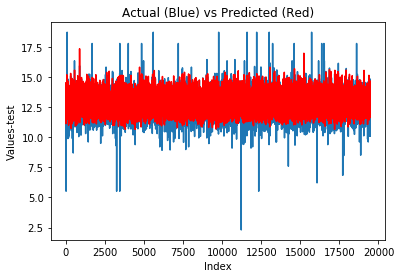

In [93]:
#Plotting the actual vs predicted values
plt.plot(nndf.index,nndf['LOGPRICE'])
plt.plot(nndf.index,nndf['PRED'], color='red')
plt.xlabel('Index')
plt.ylabel('Values-test')
plt.title('Actual (Blue) vs Predicted (Red)')
plt.show()

Text(0,0.5,'Predicted Y')

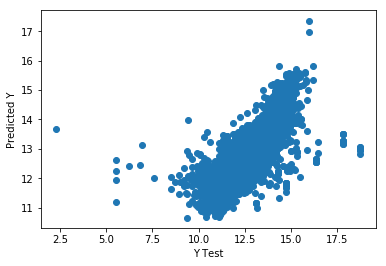

In [94]:
plt.scatter(nndf['LOGPRICE'],nndf['PRED'])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Q9. Build regression models on the training data (used in previous question) using other regression techniques such as Ridge Regression, Lasso Regression, Decision Trees, kNN, SVM, Random Forest, Boosted Trees, etc. You will need to explore hyper parameter tuning techniques to adjust the parameters of these algorithms.
Evaluate the models built here and check if the model performance on test data is acceptable.
Finally, decide/choose the best regression model (both Q8 and Q9) that gives the best predictions.
Ridge Regression

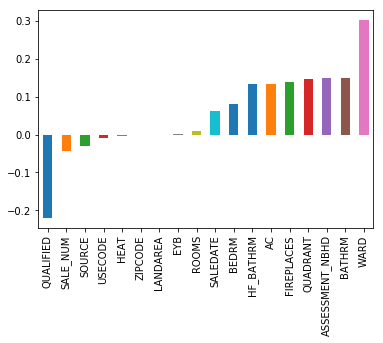

In [95]:
coeff_df.Coefficient.sort_values().plot.bar()